## Building A Logistic Regression in Python, Step by Step

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

#### Logistic Regression Assumptions
    • Binary logistic regression requires the dependent variable to be binary.
    • For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
    • Only the meaningful variables should be included.
    • The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
    • The independent variables are linearly related to the log odds.
    • Logistic regression requires quite large sample sizes.
Keeping the above assumptions in mind, let’s look at our dataset.

#### Data
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). <br>
The dataset can be downloaded from here: https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [1]:
#main imports

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# read the main data and explore the head rows
main_data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv', header=0)
main_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# explore the end value of the provided data
main_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [4]:
# explore the shape of the provided dataset
main_data.shape

#41187 rows and 21 columns

(41188, 21)

In [5]:
# extract all column names in a valiable
data_cols = main_data.columns
data_cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
# perform a check to see if there is any missing value
main_data.isnull().values.any()

False

In [7]:
# explore the types of the values in all columns
main_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

#### Input variables

    1. age (numeric)
    2. job : 
        - type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services, “student”, “technician”, “unemployed”, “unknown”)
        - marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
        - education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree, “unknown”)
    3. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
    4. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
    5. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
    6. contact: contact communication type (categorical: “cellular”, “telephone”)
    7. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
    8. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
    9. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
    10. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    11. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    12. previous: number of contacts performed before this campaign and for this client (numeric)
    13. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
    14. emp.var.rate: employment variation rate — (numeric)
    15. cons.price.idx: consumer price index — (numeric)
    16. cons.conf.idx: consumer confidence index — (numeric)
    17. euribor3m: euribor 3 month rate — (numeric)
    18. nr.employed: number of employees — (numeric)

#### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)


In [8]:
#The education column of the dataset has many categories and we need to reduce the categories for a better modelling. \
#The education column has the following categories:

main_data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [9]:
# group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”

main_data['education']=np.where(main_data['education'] =='basic.9y', 'Basic', main_data['education'])
main_data['education']=np.where(main_data['education'] =='basic.6y', 'Basic', main_data['education'])
main_data['education']=np.where(main_data['education'] =='basic.4y', 'Basic', main_data['education'])


In [10]:
#after grouping:
main_data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data exploration

In [11]:
# explore and count the values in 'y' column
main_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

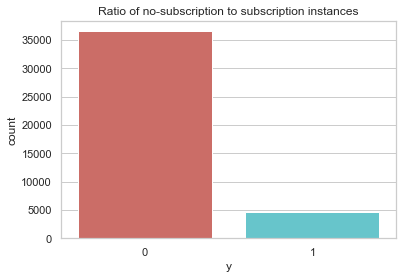

In [12]:
# the ratio of no-subscription to subscription instances
# 1 = 'yes' and 0 = 'no'

sns.countplot(x='y', data=main_data, palette='hls')
plt.title('Ratio of no-subscription to subscription instances')
plt.show()

In [13]:
count_no_sub = len(main_data[main_data['y']==0])
count_sub = len(main_data[main_data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("The percentage of no-subscription is:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("The percentage of subscription:", pct_of_sub*100)

The percentage of no-subscription is: 88.73458288821988
The percentage of subscription: 11.265417111780131


#### The percentage of no subscription is 88.73458288821988
#### The percentage of subscription 11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [14]:
main_data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Observations:<br>

 - The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
 - The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
 - Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.<br>

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.


In [15]:
main_data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286
